## QuasarNET Performance vs SNR
#### Plot to show performance of QuasarNET as a function of SNR
xxx

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
  
import astropy
import numpy as np
from matplotlib import pyplot as plt

from quasarnet.io import read_truth
from qn_analysis import plot, strategy, utils, variables

In [2]:
figsize = (12,6.5)
fontsize = 18

plt.rc('font', size=fontsize)

### Load the results from the different QN models

In [3]:
## General parameters
common_specids = False
exptype = 'randexp'

## QN parameters
n_detect = 1
c_th = 0.8
include_c_qn = True

In [4]:
f_truth = variables.OUTDIR+'/data/truth/truth_dr12q.fits'
truth = read_truth([f_truth])

In [5]:
data = {}

## Load the VI data.
#f_sdrq = '/global/projecta/projectdirs/sdss/staging/dr12/boss/qso/DR12Q/Superset_DR12Q.fits'
#data['VI'] = load_sdrq_data(f_sdrq)

## Load the QN data.
f_qn = variables.OUTDIR+'/outputs/qn_outputs/main_setup/coadd/prop_0.1/model_indtrain_0_0/qnAll-train_0.1_coadd_0_0-test_coadd.fits'
data['QN_cc'] = utils.load_qn_data(f_qn,n_detect=n_detect,c_th=c_th,include_c=include_c_qn)

## Load the QN data.
f_qn = variables.OUTDIR+'/outputs/qn_outputs/main_setup/{e}/prop_0.1/model_indtrain_0_0/qnAll-train_0.1_{e}_0_0-test_coadd.fits'.format(e=exptype)
data['QN_sc'] = utils.load_qn_data(f_qn,n_detect=n_detect,c_th=c_th,include_c=include_c_qn)

## Load the QN data.
f_qn = variables.OUTDIR+'/outputs/qn_outputs/main_setup/coadd/prop_0.1/model_indtrain_0_0/qnAll-train_0.1_coadd_0_0-test_{e}.fits'.format(e=exptype)
data['QN_cs'] = utils.load_qn_data(f_qn,n_detect=n_detect,c_th=c_th,include_c=include_c_qn)

## Load the QN data.
f_qn = variables.OUTDIR+'/outputs/qn_outputs/main_setup/{e}/prop_0.1/model_indtrain_0_0/qnAll-train_0.1_{e}_0_0-test_{e}.fits'.format(e=exptype)
data['QN_ss'] = utils.load_qn_data(f_qn,n_detect=n_detect,c_th=c_th,include_c=include_c_qn)

### Find the set of common spectra, and reduce all data to that set
This finds which spectra* are common to all datasets, and removes any that are not common. It then matches the data from each classifier to each spectrum, and produces a single data table.

\* using spec_id = plate$\times$1000000000 + mjd$\times$10000 + fiber for BOSS, or spec_id = targetid for DESI (to be updated)

In [6]:
data_table = utils.reduce_data_to_table(data,truth,include_c_qn=include_c_qn,common_specids=common_specids)
data_table[:5]

SPEC_ID,OBJ_ID,ZCONF_PERSON,Z_VI,CLASS_VI,ISQSO_VI,Z_QN_cc,CLASS_QN_cc,ISQSO_QN_cc,C_QN_cc [6],Z_LINES_QN_cc [6],Z_QN_sc,CLASS_QN_sc,ISQSO_QN_sc,C_QN_sc [6],Z_LINES_QN_sc [6],Z_QN_cs,CLASS_QN_cs,ISQSO_QN_cs,C_QN_cs [6],Z_LINES_QN_cs [6],Z_QN_ss,CLASS_QN_ss,ISQSO_QN_ss,C_QN_ss [6],Z_LINES_QN_ss [6]
int64,int64,int64,float64,str8,bool,float64,str8,bool,float64,float64,float64,str8,bool,float64,float64,float64,str8,bool,float64,float64,float64,str8,bool,float64,float64
7166566020362,20589337,2,1.616,QSO,True,1.615,NONQSO,False,0.000 .. 0.000,2.137 .. 0.466,1.636,QSO,True,0.002 .. 0.000,2.277 .. 0.378,1.620,NONQSO,False,0.000 .. 0.000,2.279 .. 0.484,1.137,NONQSO,False,0.014 .. 0.000,2.381 .. 0.479
7166566020367,20603085,2,2.070,QSO,True,--,--,--,-- .. --,-- .. --,2.099,QSO,True,0.997 .. 0.000,2.094 .. 0.344,--,--,--,-- .. --,-- .. --,2.130,QSO,True,0.978 .. 0.000,2.135 .. 0.256
7169566280047,20935261,2,0.000,STAR,False,3.517,NONQSO,False,0.000 .. 0.000,3.517 .. 0.349,--,--,--,-- .. --,-- .. --,3.241,NONQSO,False,0.000 .. 0.000,3.241 .. 0.344,--,--,--,-- .. --,-- .. --
7169566280046,20935742,2,0.000,STAR,False,0.459,NONQSO,False,0.000 .. 0.000,4.656 .. 0.341,0.702,NONQSO,False,0.000 .. 0.000,3.560 .. 0.465,0.961,NONQSO,False,0.000 .. 0.000,2.631 .. 0.358,1.683,NONQSO,False,0.000 .. 0.000,3.818 .. 0.115
7169566280052,20936956,2,0.000,STAR,False,0.974,NONQSO,False,0.000 .. 0.000,2.577 .. 0.353,3.866,NONQSO,False,0.000 .. 0.000,3.866 .. -0.216,0.359,NONQSO,False,0.000 .. 0.000,4.680 .. 0.359,2.931,NONQSO,False,0.000 .. 0.000,2.931 .. 0.458


In [7]:
# Include only objects in the data table that have the highest confidence level, and VI redshift not equal to -1.
w = (data_table['ZCONF_PERSON']==2) & (data_table['Z_VI']>-1)
data_table = data_table[w]
len(data_table)

566609

### Compare the performance of the different model/data combos.
xxx

In [8]:
## General parameters
dv_max = 6000. #km/s

## QN parameters
cth = 0.8
n_detect = 1

# confidence thresholds.
c_th_min = 0.0
c_th_max = 1.0
n_int = 101
c_th_values = np.linspace(c_th_min,c_th_max,n_int)

In [9]:
## Define strategies.
strategies = {}

for s in data.keys():
    
    if type(data_table['ISQSO_{}'.format(s)])==astropy.table.column.MaskedColumn:
        filt = (~data_table['ISQSO_{}'.format(s)].data.mask)
    else:
        filt = np.ones(len(data_table)).astype(bool)
    temp_data_table = data_table[filt]
        
    strat = strategy.Strategy('qn',cf_kwargs={'qn_name':s})
    preds = [strat.predict(temp_data_table,c_kwargs={'c_th':c_th_value,'n_detect':n_detect}) for c_th_value in c_th_values]
    strategies[s] = {'predictions': preds,
                    }
    
    """strategies[s] = {'w': ((temp_data_table['C_{}'.format(s)]>cth).sum(axis=1)>=n_detect),
                     'confs': (temp_data_table['C_{}'.format(s)]).max(axis=1),
                     'z': temp_data_table['Z_{}'.format(s)],
                    }"""

QN_cc
number of stars is 486
number of zerr is 485
number of classified QSOs is 288406
number of correctly classified QSOs is 287435



/global/u1/j/jfarr/.conda/envs/qnet/lib/python3.7/site-packages/qn_analysis/plot.py:35: RuntimeWarning: invalid value encountered in long_scalars
  pur = pur_num/pur_denom
/global/u1/j/jfarr/.conda/envs/qnet/lib/python3.7/site-packages/qn_analysis/plot.py:438: RuntimeWarning: invalid value encountered in greater
  ind = np.where(pur>com)[0][0]


cth: [0.07 0.08 0.09 0.1 ]
pur: [0.99372797 0.99400732 0.99421519 0.99442673]
com: [0.99435773 0.99424378 0.99412638 0.99401588]

QN_sc
number of stars is 1018
number of zerr is 830
number of classified QSOs is 290062
number of correctly classified QSOs is 288214

cth: [0.46 0.47 0.48 0.49]
pur: [0.99340092 0.99345887 0.99352008 0.99358121]
com: [0.99359439 0.99357021 0.99351493 0.99345274]

QN_cs
number of stars is 196
number of zerr is 1264
number of classified QSOs is 272934
number of correctly classified QSOs is 271474

cth: [0.   0.01 0.02]
pur: [0.55939101 0.97148612 0.97871039]
com: [0.97107745 0.96216864 0.95936133]

QN_ss
number of stars is 1130
number of zerr is 2018
number of classified QSOs is 284354
number of correctly classified QSOs is 281206

cth: [0.08 0.09 0.1  0.11]
pur: [0.9747589  0.97582769 0.97683379 0.97771743]
com: [0.97713822 0.97691019 0.97671671 0.97651977]



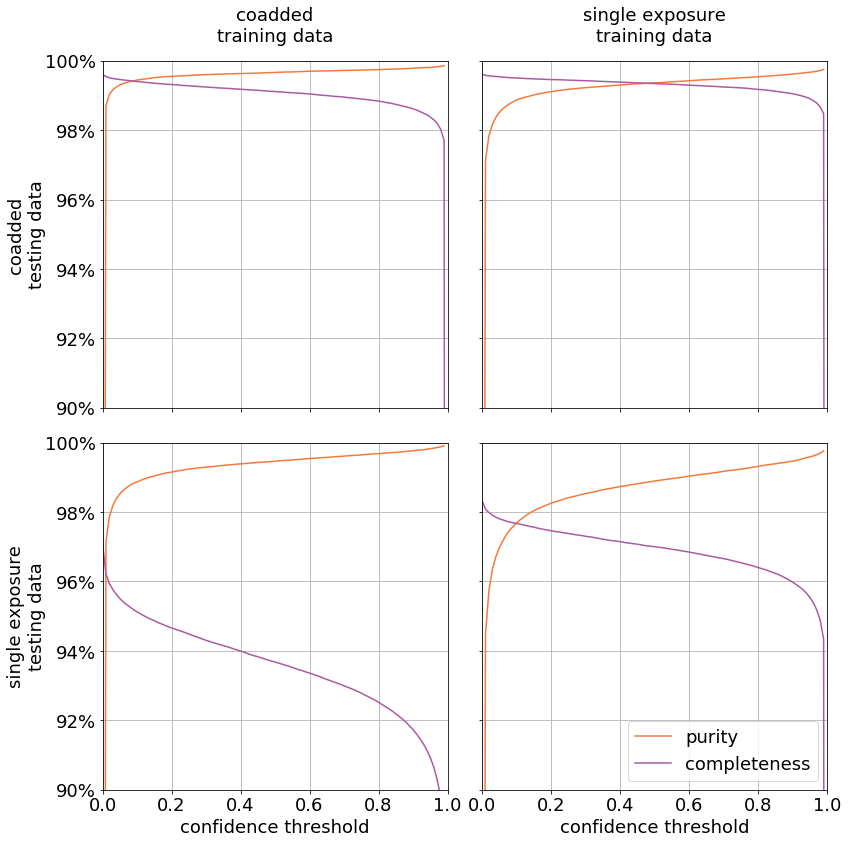

In [10]:
filename = '../plots/qn_performance_vs_snr.pdf'

plot.plot_qn_model_data_compare(data_table,strategies,filename=filename,
                                dv_max=dv_max,nydec=0,figsize=(12,12),
                                ymin=0.90,ymax=1.,verbose=True,c_th=c_th_values)

plt.show()